# ОИАД. Лабораторная работа №1

Используйте набор данных 'datasets/teen_phone_addiction_dataset.csv'. 

Возьмите столбец $N \% 7 $, где $N$ - номер в списке группы (см. ниже).

## I. 
Рассчитайте характеристики:
1. Среднее
2. Дисперсия
3. Мода
4. Медиана
5. Квантили уровня 0.25, 0.5, 0.75
6. Эксцесс
7. Ассиметрия
8. Интерквартильный размах

Построить графики:
1. Гистограмма
2. Эмпирическая функция распределения

## II. 
Проверить данные на нормальность, используя критерии:
1. Хи-квадрат (Реализовать самому, не используя библиотечные варианты!!)
2. Ассиметрии и эксцесса

Построить Q-Q plot

## III. 
Используя техники обработки данных, постарайтесь привести данные к нормальному распределению.  Например, с помощью:
1. Удаление, усечение выбросов
2. Стандартизация, нормировка
3. Логарифмирование и т.п.

Выполните пункты I и II для обработанных данных

## IV.
Сгруппируйте данные по столбцу 'School_Grade'. 

1. На одном графике постройте гистограммы для каждой группы.
2. Рассчитайте среднее, дисперсию внутри каждой группы

## V.
После каждого пункта сделайте промежуточные выводы:
1. Опишите полученные числовые характеристики и графики
2. Являются ли данные нормальными
3. Эффект от обработки данных (удалось ли привести данные к нормальному виду)
4. Различия распределений внутри разных групп 'School_Grade'




In [78]:
N = 14
cols = ['Daily_Usage_Hours', 'Sleep_Hours', 'Exercise_Hours', 'Screen_Time_Before_Bed', 'Time_on_Social_Media', 'Time_on_Gaming', 'Time_on_Education']
col=cols[N % 7]

In [79]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import math

In [80]:
dataset=pd.read_csv('../datasets/teen_phone_addiction_dataset.csv')
data=dataset[col]
data

0       4.0
1       5.5
2       5.8
3       3.1
4       2.5
       ... 
2995    3.9
2996    3.6
2997    3.2
2998    6.7
2999    3.5
Name: Daily_Usage_Hours, Length: 3000, dtype: float64

In [81]:
np.mean(data)

5.020666666666667

In [82]:
np.var(data,ddof=1)

3.827895520729132

In [83]:
stats.mode(data)

ModeResult(mode=4.4, count=74)

In [84]:
np.median(data)

5.0

In [85]:
print(np.quantile(data,0.25))
print(np.quantile(data,0.5))
print(np.quantile(data,0.75))

3.7
5.0
6.4


In [86]:
stats.kurtosis(data) #эксцесс, приближенно к нормальному

-0.1226141759584718

In [87]:
stats.skew(data) # малая правая асимметрия 

0.016197292999157842

In [88]:
stats.iqr(data) #75 квантиль - 25 квантиль

2.7

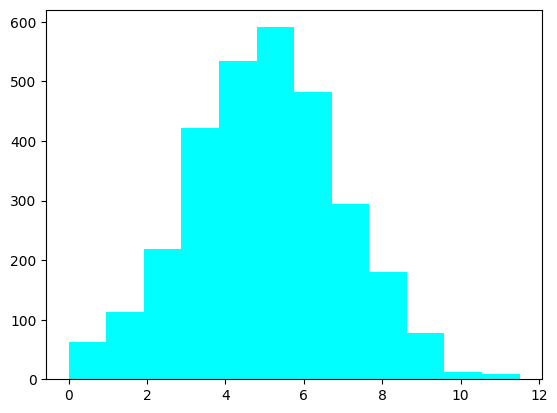

In [89]:
plt.hist(data,bins=1+int(math.log(data.shape[0],2)),color="aqua") #формула Стерджесса
plt.show()

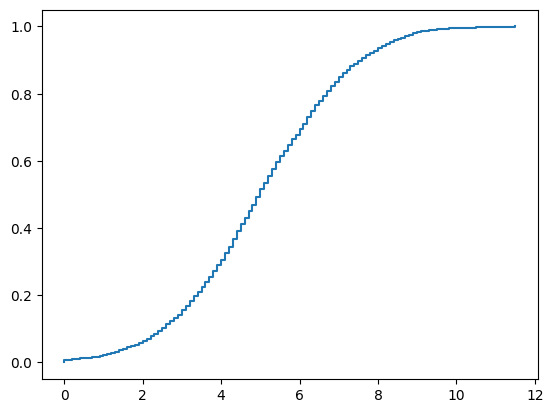

In [90]:
def func_distribution(data):
    values,counts=np.unique(data,return_counts=True)
    graphic_counts=np.zeros(counts.shape[0]*3)
    graphic_values=np.zeros(values.shape[0]*3)
    sum=0
    point=0
    for i in range(counts.shape[0]):
        graphic_counts[i*3]=sum
        graphic_counts[i*3+1]=sum
        sum+=counts[i]
        graphic_counts[i*3+2]=sum
        graphic_values[i*3]=point
        point=values[i]
        graphic_values[i*3+1]=point
        graphic_values[i*3+2]=point
    plt.plot(graphic_values,graphic_counts/data.shape[0])
    plt.show()
func_distribution(data)

Мы имеем распределение похожее на нормальное с незначительной правой асимметрией. 

In [91]:
def chi2_test(data,alpha):
    k=1+int(math.log(data.shape[0],2))
    min_data=np.min(data)
    max_data=np.max(data)
    h=(max_data-min_data)/k
    data_observe=(data-min_data)/h
    average=np.mean(data)
    std=math.sqrt(np.var(data,ddof=1))
    _, count_observe=np.unique(data_observe.astype(np.int64),return_counts=True)
    count_observe[-2]=count_observe[-2]+count_observe[-1]
    count_observe=count_observe[:-1]
    freq_observe=count_observe
    freq_expect=np.array(list(map(lambda i:(stats.norm.cdf(min_data+h*(i+1),loc=average,scale=std)-stats.norm.cdf(min_data+h*(i),loc=average,scale=std))*data.shape[0],range(k))))
    chi2_stat=0
    chi2_stat=np.sum((freq_observe-freq_expect)**2/(freq_expect+1e-6))
    df=k-1-2
    crit_val=stats.chi2.ppf(1-alpha,df)
    return chi2_stat<=crit_val
chi2_test(data,0.05)

False

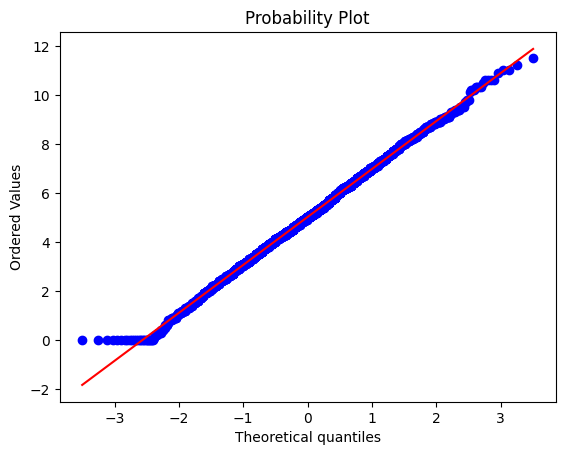

In [92]:
stats.probplot(data,dist="norm",plot=plt)
plt.show()

Хи-квадрат не выполняется, коэффициенты асимметрии и эксцесса не показывают значительного отклоненеия. Мы отвергаем теорию нормального распределение по хи-квадрат. Q-Q показывает что мы имеем тяжёлый левый хвост.

In [93]:
np.unique(data,return_counts=True)

(array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
         1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
         2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
         3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
         4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
         5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
         6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
         7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
         8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.7,  9.8, 10.1,
        10.2, 10.3, 10.5, 10.6, 10.9, 11. , 11.2, 11.5]),
 array([25,  1,  3,  5,  4,  2,  4,  1,  7, 10,  4,  9, 11, 12, 11, 12, 13,
        14, 10, 17, 18, 14, 28, 17, 25, 31, 32, 34, 20, 34, 42, 34, 41, 46,
        36, 51, 41, 44, 53, 58, 42, 62, 54, 69, 74, 59, 55, 62, 57, 73, 64,
        58, 62, 65, 63, 54, 44, 51, 54, 39, 49, 

Выброс в 0 присутствует

In [94]:
new_data,_=stats.yeojohnson(data)

In [95]:

print(np.mean(new_data))
print(np.var(new_data,ddof=1))
print(stats.mode(new_data))
print(np.median(new_data))
print(np.quantile(new_data,0.25))
print(np.quantile(new_data,0.5))
print(np.quantile(new_data,0.75))
print(stats.kurtosis(new_data))
print(stats.skew(new_data))
print(stats.iqr(new_data))
print(chi2_test(new_data,0.05))

4.790973183747704
3.3485906453571763
ModeResult(mode=4.222820070295914, count=74)
4.783876186138952
3.5651818166002154
4.783876186138952
6.0849420818100475
-0.10855272047269615
-0.02338568873727437
2.519760265209832
False


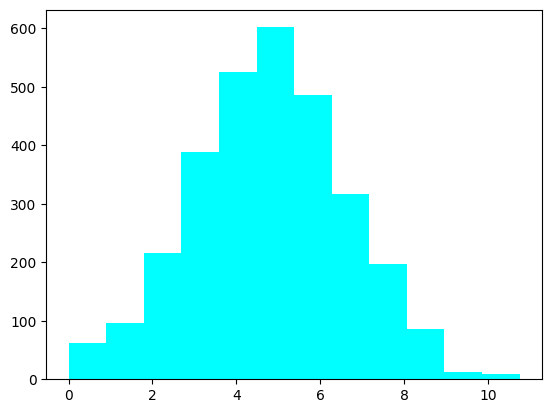

In [96]:
plt.hist(new_data,bins=1+int(math.log(new_data.shape[0],2)),color="aqua") #формула Стерджесса
plt.show()

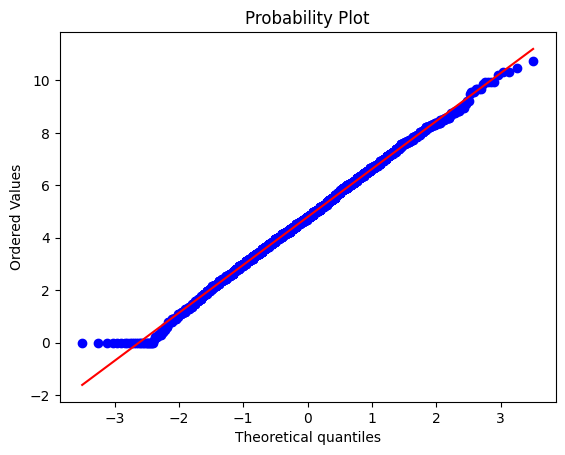

In [97]:
stats.probplot(new_data,dist="norm",plot=plt)
plt.show()

Мы не смогли привести данные к нормальным, однако получилось немного уменьшить левый хвост преобразованием Yeo-johnson

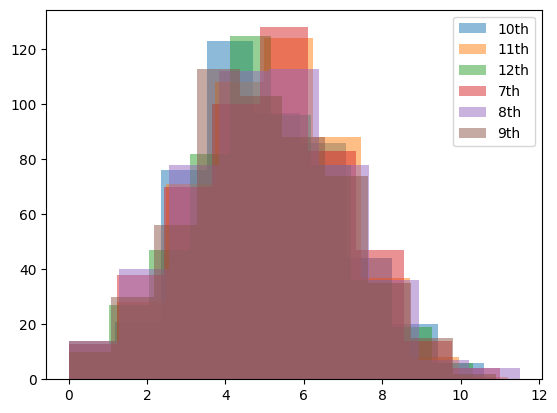

In [98]:
grades=np.unique(dataset['School_Grade'])
for grade in grades:
    grade_dataset=dataset[dataset['School_Grade']==grade]
    grade_data=grade_dataset[col]
    plt.hist(grade_data,bins=1+int(math.log(grade_data.shape[0],2)),label=grade,alpha=0.5)
plt.legend()
plt.show()

In [100]:
frame=pd.DataFrame(columns=['Grade','mean','variable'])
frame.loc[0]=["All",np.mean(data),np.var(data,ddof=1)]
for i in range(grades.shape[0]):
    grade_dataset=dataset[dataset['School_Grade']==grades[i]]
    grade_data=grade_dataset[col]
    frame.loc[i+1]=[grades[i],np.mean(grade_data),np.var(grade_data,ddof=1)]
frame


,Grade,mean,variable
0,All,5.020667,3.827896
1,10th,4.977618,3.812605
2,11th,5.061795,3.635211
3,12th,4.936862,3.735589
4,7th,5.077062,3.883344
5,8th,5.066390,4.009513
6,9th,5.012167,3.912652


Разброс средних и дисперсий невелик, однако по гистограммам заметно, что моды заметно различаются. Сложно сказать про принадлежность одному или разному распределению, однако все имеют тяжёлые левые хвосты.